# 1st Quarter of Emergency Data in 2021

## Content

- Introduction
- Features description
- Explore data
- Computing Duration of Leave
- Count & percentage of Patients who entered clinic
- Count & percentage of Patients who stayed emergency clininc
- Conslultations Analysis
- Lab Tests Analysis
- Radilogy Analysis
- Pharmacy Analysis

## Intorduction

This is the development environment which we used to check the data and sure our outcomes are correctanced. After we sured all outcomes were correctanced, we used OOP to design system which take path of data and get up outcomes based on specific variable we can select. This step in the next file.

## Features description

|Feature Name | Descrption |
|:-------------------|:--------------------:|
|PATIENT_FILE | refers to number of patient file |
|AGE | refers to Patient age |
|GENDER| refers to Patient gender (male"M" or femal"F") |
|NATIONALITY| refers to Patient nationality |
|COMPLAIN_DESC| refers to an illness or medical condition |
|SECTION_NO| refers to an emergency section |
|SERIAL_NO| refers to number of situation | 
|VISIT_DATE| refers to visiting date and time |
|DISCHARGE_DATE| refers to date and time which Patient went out from hospital |
|TRIAGE_DATE| referes to date and time whcih Patient went in Triage Room|
|ENTERED_CLINIC_TIME| refers to date and time which Patient transormed to Inpatient Clinic |
|CLASSIFICATION_DESC| refers to category of Patient citizen, resident and so on |
|PARTITION_DESC| refers to the room which patient transmit it after the initial inpection|
|IS_ADMITTED| refers to a patinet statment deserve the care or leave the emergency|
|CONSULTATIONS| refers to details "text" of consultations which patient had received it|
|LAB_TEST| refers to details "text" of lab tests which patient had got it|
|RADIOLOGY| refers to details "text" of radilogy which patient had got it|
|PHARMECY| refers to details "text" of pharmacy which patient had got it|

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Read data
df = pd.read_excel('emergency_data.xlsx')

## Explore Data

In [3]:
# display the 1st five rows
df.head()

,PATIENT_FILE,AGE,GENDER,NATIONALITY,COMPLAIN_DESC,SECTION_NO,SERIAL_NO,VISIT_DATE,DISCHARGE_DATE,TRIAGE_DATE,ENTERED_CLINIC_TIME,CLASSIFICATION_DESC,PARTITION_DESC,IS_ADMITTED,ADMISSION_DATE,ARRIVAL_DATE,CONSULTATIONS,LAB_TEST,RADIOLOGY,PHARMECY
0,438288-F,52,F,Saudi,SICK,1852,3891132,2021-01-01 23:24:54,2021-01-02 01:31:00,2021-01-01 23:24:54,NaT,CITIZEN,Urgent Care Area,No,NaT,NaT,NaN,NaN,NaN,NaN
1,819221-F,3,F,Saudi,OTHER ACCIDENTS,1852,3891133,2021-01-01 23:26:36,2021-01-02 00:37:00,2021-01-01 23:26:36,NaT,CITIZEN,Trauma Care Area,No,NaT,NaT,Request:01-01-2021 23:38 Reply:02-01-2021 00:36,NaN,NaN,"3945770 START: ,02-01-2021 00:36, END: ,02-01-..."
2,384018-F,51,F,Saudi,SICK,1852,3891134,2021-01-01 23:30:44,2021-01-02 00:57:00,2021-01-01 23:30:44,2021-01-02 00:57:46,CITIZEN,Urgent Care Area,No,NaT,NaT,NaN,NaN,NaN,"3945782 START: ,02-01-2021 00:57, END: ,02-01-..."
3,405077-T,34,M,Saudi,OTHER ACCIDENTS,1852,3891135,2021-01-01 23:37:20,2021-01-02 00:09:00,2021-01-01 23:37:20,NaT,CITIZEN,Trauma Care Area,No,NaT,NaT,NaN,NaN,NaN,"3945747 START: ,02-01-2021 00:09, END: ,02-01-..."
4,2311828-T,3,F,Saudi,OTHER ACCIDENTS,1852,3891136,2021-01-01 23:43:38,2021-01-02 00:01:00,2021-01-01 23:43:38,NaT,CITIZEN,Trauma Care Area,No,NaT,NaT,NaN,NaN,NaN,"3945742 START: ,02-01-2021 00:01, END: ,02-01-..."


In [4]:
# display the number of rows and columns"features" respectivly
df.shape

(29956, 20)

In [5]:
# display the number of null values for each columns "features"
df.isna().sum()

PATIENT_FILE               0
AGE                        0
GENDER                     0
NATIONALITY                0
COMPLAIN_DESC              0
SECTION_NO                 0
SERIAL_NO                  0
VISIT_DATE                 0
DISCHARGE_DATE             0
TRIAGE_DATE                2
ENTERED_CLINIC_TIME    18041
CLASSIFICATION_DESC        0
PARTITION_DESC             0
IS_ADMITTED                0
ADMISSION_DATE         26614
ARRIVAL_DATE           26614
CONSULTATIONS          18448
LAB_TEST               18162
RADIOLOGY              16327
PHARMECY               16449
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29956 entries, 0 to 29955
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PATIENT_FILE         29956 non-null  object        
 1   AGE                  29956 non-null  int64         
 2   GENDER               29956 non-null  object        
 3   NATIONALITY          29956 non-null  object        
 4   COMPLAIN_DESC        29956 non-null  object        
 5   SECTION_NO           29956 non-null  int64         
 6   SERIAL_NO            29956 non-null  int64         
 7   VISIT_DATE           29956 non-null  datetime64[ns]
 8   DISCHARGE_DATE       29956 non-null  datetime64[ns]
 9   TRIAGE_DATE          29954 non-null  datetime64[ns]
 10  ENTERED_CLINIC_TIME  11915 non-null  datetime64[ns]
 11  CLASSIFICATION_DESC  29956 non-null  object        
 12  PARTITION_DESC       29956 non-null  object        
 13  IS_ADMITTED          29956 non-

# DURATION OF LEAVE

$ DURATION\ OF\ LEAVE =  DISCHARGE\ DATE - VISIT\ DATE $

In [7]:
def duration_of_leave(df, entering_emergency_date, outing_emergency_date):
    ''' compute duration of leave'''
    df['Duration of Leave'] = df[outing_emergency_date] - df[entering_emergency_date]
    return df['Duration of Leave']

In [8]:
dur_leave = duration_of_leave(df, 'VISIT_DATE', 'DISCHARGE_DATE')

In [9]:
pd.DataFrame(dur_leave.describe())

,Duration of Leave
count,29956
mean,0 days 02:51:16.104920550
std,0 days 15:53:57.306856367
min,0 days 00:00:02
25%,0 days 00:44:47
50%,0 days 01:48:17
75%,0 days 03:33:32.250000
max,68 days 15:03:36


In [10]:
print('Pecentage of Patients who left less than four Hours: ', round(df[df['Duration of Leave'] < '0 days 4:00:00'].shape[0] / df.shape[0] * 100), '%')

Pecentage of Patients who left less than four Hours:  79 %


In [11]:
print('Pecentage of Patients who left in four Hours or more than: ', round(df[df['Duration of Leave'] >= '0 days 4:00:00'].shape[0] / df.shape[0] * 100), '%')

Pecentage of Patients who left in four Hours or more than:  21 %


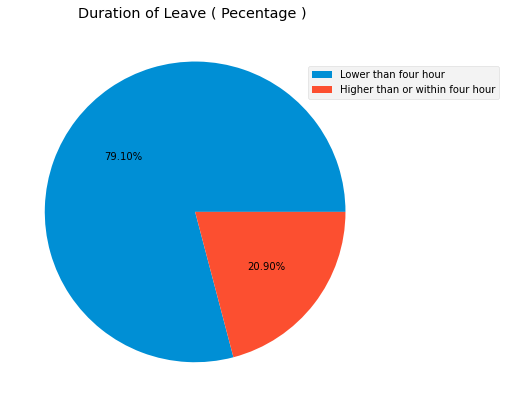

In [12]:
plt.figure(figsize=(6,8))
x = [
round(df[df['Duration of Leave'] < '0 days 4:00:00'].shape[0] / df.shape[0] * 100,1) ,
round(df[df['Duration of Leave'] >= '0 days 4:00:00'].shape[0] / df.shape[0] * 100,1)
]

plt.pie(
    x = x,
    autopct='%1.2f%%')
plt.title('Duration of Leave ( Pecentage ) ')
plt.legend(['Lower than four hour', 'Higher than or within four hour'], loc=(0.8,0.8));

# Find count and percentage of patient who entered clinic

In [13]:
df[~df['ENTERED_CLINIC_TIME'].isna()]['ENTERED_CLINIC_TIME'].shape[0]

11915

In [14]:
df['TRIAGE_DATE'][df[~df['ENTERED_CLINIC_TIME'].isna()].index].shape[0]

11915

In [15]:
print(round(df[~df['ENTERED_CLINIC_TIME'].isna()]['ENTERED_CLINIC_TIME'].shape[0] / df.shape[0] *100), '%')

40 %


In [16]:
round(df[df['ENTERED_CLINIC_TIME'].isna()]['ENTERED_CLINIC_TIME'].shape[0] / df.shape[0] *100)

60

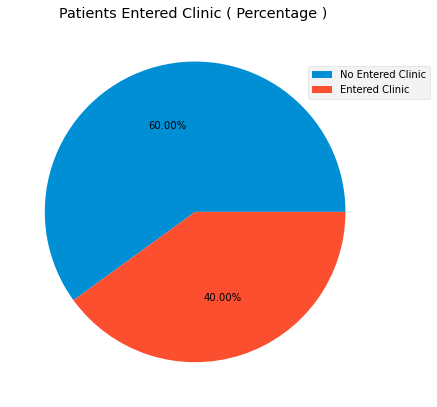

In [17]:
plt.figure(figsize=(6,8))
x = [
round(df[df['ENTERED_CLINIC_TIME'].isna()]['ENTERED_CLINIC_TIME'].shape[0] / df.shape[0] *100),
round(df[~df['ENTERED_CLINIC_TIME'].isna()]['ENTERED_CLINIC_TIME'].shape[0] / df.shape[0] *100) 
]

plt.pie(
    x = x,
    autopct='%1.2f%%')
plt.title('Patients Entered Clinic ( Percentage ) ')
plt.legend(['No Entered Clinic', 'Entered Clinic'], loc=(0.8,0.8));

# Compute duration which patient stayed at an emergency clinic

In [18]:
clinic_minuse_teriage = df[~df['ENTERED_CLINIC_TIME'].isna()]['ENTERED_CLINIC_TIME'] - df['TRIAGE_DATE'][df[~df['ENTERED_CLINIC_TIME'].isna()].index]

In [19]:
clinic_to_triage = clinic_minuse_teriage.drop(clinic_minuse_teriage[clinic_minuse_teriage > '0 days 23:59:59'] .index)

In [20]:
pd.DataFrame(clinic_to_triage.describe(), columns=['Duration of Entering Clinic'])

,Duration of Entering Clinic
count,11914
mean,0 days 00:37:26.348497565
std,0 days 00:38:04.617027805
min,0 days 00:00:56
25%,0 days 00:14:38
50%,0 days 00:27:37.500000
75%,0 days 00:48:07.750000
max,0 days 16:51:34


In [21]:
df['TRIAGE_TO_CLININ_DURAION'] = clinic_minuse_teriage

- Within 10 Minutes

In [22]:
within_10_m = round(clinic_minuse_teriage[clinic_minuse_teriage <= '0 days 00:10:00'].shape[0] / clinic_minuse_teriage.shape[0] * 100)
print(within_10_m, '%', sep='')

14%


- Within 20 Minutes

In [23]:
within_20_m = round(clinic_minuse_teriage[clinic_minuse_teriage <= '0 days 00:20:00'].shape[0] / clinic_minuse_teriage.shape[0] * 100)
print(within_20_m, '%', sep='')

37%


- Within 30 Minutes

In [24]:
within_30_m = round(clinic_minuse_teriage[clinic_minuse_teriage <= '0 days 00:30:00'].shape[0] / clinic_minuse_teriage.shape[0] * 100)
print(within_30_m, '%', sep='')

54%


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-25-22c1134743c0>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)


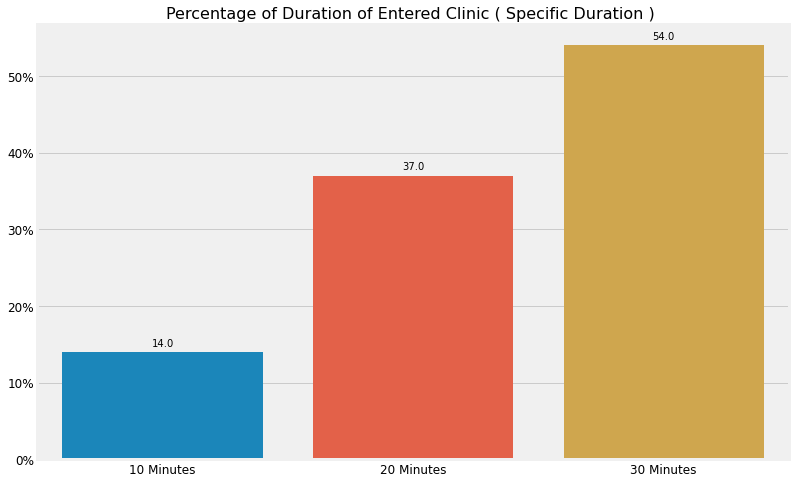

In [25]:
plt.figure(figsize=(12,8))

x = ['10 Minutes', '20 Minutes', '30 Minutes']
y = [ within_10_m, within_20_m, within_30_m]

splot = sns.barplot(x,y)

for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')

    
splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)
plt.title('Percentage of Duration of Entered Clinic ( Specific Duration ) ', fontsize=16);

# Analyzing CONSULTATIONS Feature

In [26]:
# Number of patients who did not receive consultations
df['CONSULTATIONS'].isna().sum()

18448

In [27]:
# Number of patients who received consulataions
df[~df['CONSULTATIONS'].isna()].shape[0]

11508

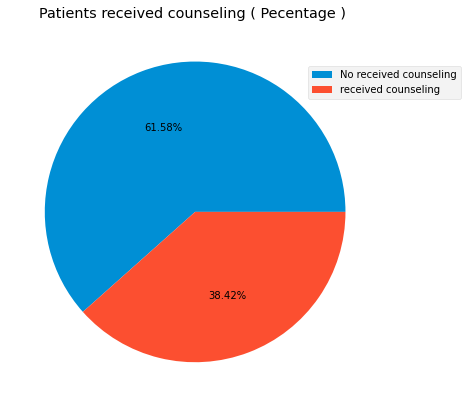

In [28]:
plt.figure(figsize=(6,8))
x = [
df[df['CONSULTATIONS'].isna()].shape[0]/df.shape[0] * 100 ,
df[~df['CONSULTATIONS'].isna()].shape[0] / df.shape[0] * 100
]

plt.pie(
    x = x,
    autopct='%1.2f%%')
plt.title('Patients received counseling ( Pecentage ) ')
plt.legend(['No received counseling', 'received counseling'], loc=(0.8,0.8));

In [29]:
# crete mask to ignore patients who did not receive consulations
mask = df['CONSULTATIONS'].isna()

# split each order of consultation by semicolon ";"
consultation_lst = df[~mask]['CONSULTATIONS'].apply(lambda x: x.split(';'))

In [30]:
# identify dates times of request and reply
consult_lst1 = consultation_lst.apply(lambda x: [ x[i][8:25] +'  '+ x[i][31:] for i in range(len(x)) ])

In [31]:
# convert each date time request and reply to date time style 
# then subtract reply date time from request date time
consult_lst2 = consult_lst1.apply(lambda x: [pd.to_datetime(x[i][22:24]+'-'+x[i][19:22]+x[i][25:], errors='coerce') - pd.to_datetime(x[i][3:5]+'-'+x[i][:3]+x[i][6:16], errors='coerce') for i in range(len(x)) ])

In [32]:
# convert durations to timedelta 
consult_lst3 = consult_lst2.apply(lambda x: pd.to_timedelta(x))

In [33]:
# compute total of 
consult_lst3.apply(lambda x: len(x)).value_counts().values.sum()

11508

In [34]:
# compute number of frequent consultations
pd.DataFrame(consult_lst3.apply(lambda x: len(x)).value_counts()).rename(columns={'CONSULTATIONS':'Frequent'})

,Frequent
1,9809
2,1242
3,303
4,89
5,35
6,21
7,5
8,3
10,1


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-35-a0383b040f04>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)


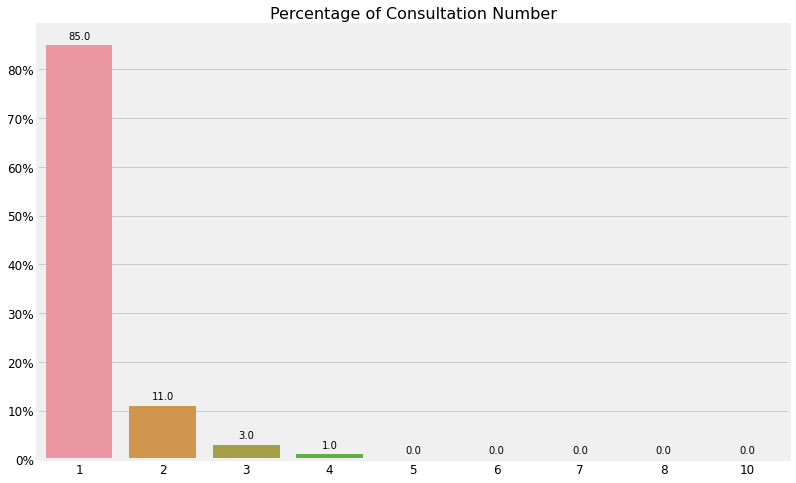

In [35]:
plt.figure(figsize=(12,8))

x = consult_lst3.apply(lambda x: len(x)).value_counts().keys()
y = consult_lst3.apply(lambda x: len(x)).value_counts(normalize=True).values.round(2) * 100

splot = sns.barplot(x,y)

for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)
plt.title('Percentage of Consultation Number', fontsize=16);

In [36]:
# find the percentage of consulations wiht reply and without reply
# length of text 47 refers to the order of consulation with reply
# lenght of text 31 refers to the order of conulation without reply
round(consultation_lst.apply(lambda x: [len(i) for i in x]).apply(lambda x: min(x)).value_counts(normalize=True)* 100)

47    90.0
31    10.0
Name: CONSULTATIONS, dtype: float64

In [37]:
# let's take a look to the indexes of consultations without reply date time
consultation_lst.apply(lambda x: [len(i) for i in x]).apply(lambda x: min(x))[consultation_lst.apply(lambda x: [len(i) for i in x]).apply(lambda x: min(x)) == 31]

31       31
32       31
39       31
53       31
56       31
         ..
29861    31
29866    31
29878    31
29885    31
29889    31
Name: CONSULTATIONS, Length: 1172, dtype: int64

In [38]:
# let us look at the index 31 which without reply date time in the second order.
df.loc[31, 'CONSULTATIONS']

'Request:01-01-2021 21:27 Reply:01-01-2021 22:12;Request:01-01-2021 21:28 Reply:'

In [39]:
# comput total of consulations with or without reply
total_consults = [item for lst in consult_lst3 for item in lst]

In [40]:
# number of all consultations
print(f'Total of Consultations: {len(total_consults)}')

Total of Consultations: 13928


In [41]:
# number of consultations without Reply Date
pd.Series(total_consults).isna().sum()

1208

In [42]:
# number of consultation with Replay Date
mask = pd.Series(total_consults).isna()
pd.Series(total_consults)[~mask].shape[0]

12720

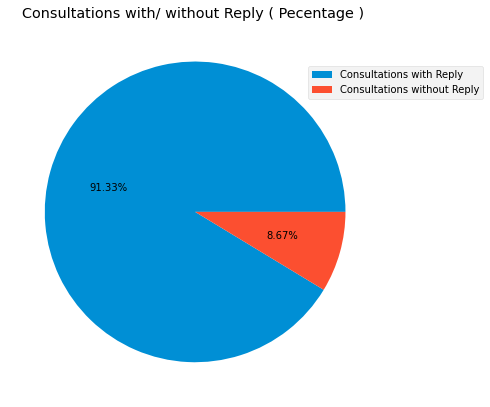

In [43]:
plt.figure(figsize=(6,8))
x = [
pd.Series(total_consults)[~pd.Series(total_consults).isna()].shape[0]/pd.Series(total_consults).shape[0] * 100 ,
pd.Series(total_consults)[pd.Series(total_consults).isna()].shape[0]/pd.Series(total_consults).shape[0] * 100 ,
]

plt.pie(
    x = x,
    autopct='%1.2f%%')
plt.title('Consultations with/ without Reply ( Pecentage ) ')
plt.legend(['Consultations with Reply', 'Consultations without Reply'], loc=(0.8,0.8));

In [44]:
df['CONSULTATIONS_DURATION'] = None

In [45]:
for i in consult_lst3.index:
    df['CONSULTATIONS_DURATION'][i] = consult_lst3[i]

<ipython-input-45-a88d969be5fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CONSULTATIONS_DURATION'][i] = consult_lst3[i]


In [46]:
pd.DataFrame(pd.Series(total_consults).describe(), columns=['All Consultations'])

,All Consultations
count,12720
mean,0 days 01:57:56.316037735
std,0 days 08:25:37.195638597
min,0 days 00:00:00
25%,0 days 00:32:00
50%,0 days 01:02:00
75%,0 days 01:53:00
max,15 days 16:01:00


In [47]:
# display the index of patient who received higher duration of consultations
pd.Series(total_consults)[pd.Series(total_consults) == '15 days 16:01:00']

18   15 days 16:01:00
dtype: timedelta64[ns]

In [48]:
# display the index of patient who received higher duration of consultations in the original data
consult_lst3.apply(lambda x: x.max())[consult_lst3.apply(lambda x: x.max()) == consult_lst3.apply(lambda x: x.max()).max()]

27   15 days 16:01:00
Name: CONSULTATIONS, dtype: timedelta64[ns]

In [49]:
# display the index of patient who received higher duration of consultations in the original data after duration was computed
df.loc[27,'CONSULTATIONS_DURATION']

TimedeltaIndex(['15 days 16:01:00', '0 days 01:13:00'], dtype='timedelta64[ns]', freq=None)

In [50]:
# display the index of patient who received higher duration of consultations in the original duration
df.loc[27,'CONSULTATIONS']

'Request:01-01-2021 19:44 Reply:17-01-2021 11:45;Request:01-01-2021 20:45 Reply:01-01-2021 21:58'

# Analyzing LAB_TEST Feature

In [51]:
df['LAB_TEST'].isna().sum()

18162

In [52]:
df[~df['LAB_TEST'].isna()].shape[0]

11794

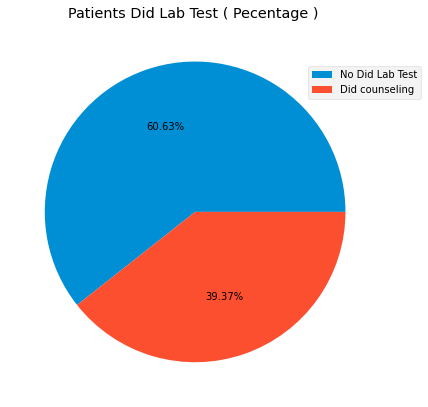

In [53]:
plt.figure(figsize=(6,8))
x = [
df[df['LAB_TEST'].isna()].shape[0]/df.shape[0] * 100 ,
df[~df['LAB_TEST'].isna()].shape[0] / df.shape[0] * 100
]

plt.pie(
    x = x,
    autopct='%1.2f%%')
plt.title('Patients Did Lab Test ( Pecentage ) ')
plt.legend(['No Did Lab Test', 'Did counseling'], loc=(0.8,0.8));

In [54]:
df['LAB_TEST'][6]

'12534510 START: ,02-01-2021 02:10, END: ,02-01-2021 03:22,;12534513 START: ,02-01-2021 02:10, END: ,02-01-2021 03:34,;12534514 START: ,02-01-2021 02:10, END: ,02-01-2021 03:42,;12534512 START: ,02-01-2021 02:10, END: ,02-01-2021 03:33,'

In [55]:
mask = df['LAB_TEST'].isna()
lab_test_lst = df[~mask]['LAB_TEST'].apply(lambda x: x.split(';'))

In [56]:
lst1 = lab_test_lst.apply(lambda x: ' '.join(x).split('START: ,')[1:])

In [57]:
lst2 = lst1.apply(lambda x: [pd.to_datetime(x[i][24:40], dayfirst=True) - pd.to_datetime(x[i][:16], dayfirst=True) for i in range(len(x))])

In [58]:
lst3 = lst2.apply(lambda x: pd.to_timedelta(x))

In [59]:
lst3.apply(lambda x: x.max())[ lst3.apply(lambda x: x.max()) == lst3.apply(lambda x: x.max()).max() ]

4507   81 days 13:59:00
Name: LAB_TEST, dtype: timedelta64[ns]

In [60]:
lst3[4507]

TimedeltaIndex(['81 days 13:59:00'], dtype='timedelta64[ns]', freq=None)

In [61]:
df['LAB_TEST'][4507]

'12565239 START: ,14-01-2021 10:47, END: ,06-04-2021 00:46,'

In [62]:
lab_test_dist = pd.DataFrame(lab_test_lst.apply(lambda x: len(x)).value_counts())
lab_test_dist.rename(columns={'LAB_TEST': 'Frequent'}, inplace=True)
lab_test_dist.index.name = 'No Lab_TESTS'
lab_test_dist.transpose()

No Lab_TESTS,3,4,2,1,5,6,7,11,8,16,...,20,13,21,45,22,30,46,54,62,67
Frequent,7211,1840,1526,835,128,72,44,30,26,10,...,1,1,1,1,1,1,1,1,1,1


In [63]:
lab_test_lst.apply(lambda x: len(x)).value_counts()

3     7211
4     1840
2     1526
1      835
5      128
6       72
7       44
11      30
8       26
16      10
9       10
12       9
15       6
10       5
18       4
29       3
14       3
48       3
28       2
17       2
37       2
26       2
25       1
57       1
34       1
40       1
24       1
47       1
50       1
58       1
19       1
27       1
23       1
20       1
13       1
21       1
45       1
22       1
30       1
46       1
54       1
62       1
67       1
Name: LAB_TEST, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-64-6d6ceb4f86cf>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)


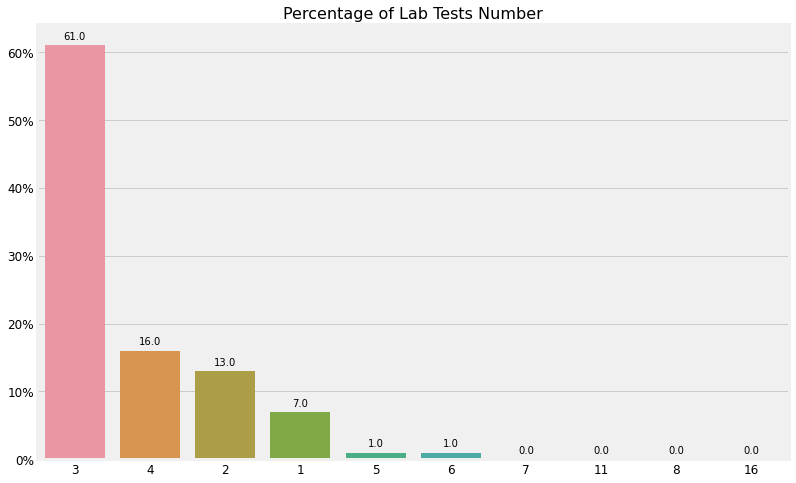

In [64]:
plt.figure(figsize=(12,8))

x = [ str(n) for n in lab_test_lst.apply(lambda x: len(x)).value_counts().keys()][:10]
y = lab_test_lst.apply(lambda x: len(x)).value_counts(normalize=True).values.round(2).tolist()[:10] 
y = [round(100 * n, 2) for n in y ]

splot = sns.barplot(x, y)

for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)
plt.title('Percentage of Lab Tests Number', fontsize=16);

In [65]:
df['LAB_TEST_DURATION'] = None

In [66]:
for i in lst3.index:
    df['LAB_TEST_DURATION'][i] = lst3[i]

<ipython-input-66-adc6c2e1045b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LAB_TEST_DURATION'][i] = lst3[i]


In [67]:
total_lab_test = [item for lst in lst3 for item in lst]

In [68]:
print(f'Total Lab Tests: {len(total_lab_test)}')

Total Lab Tests: 36640


In [69]:
pd.DataFrame(pd.Series(total_lab_test).describe(), columns=['All Lab Tests'])

,All Lab Tests
count,36640
mean,0 days 02:41:05.340065502
std,0 days 17:15:58.522196694
min,0 days 00:00:00
25%,0 days 00:41:00
50%,0 days 00:59:00
75%,0 days 01:24:00
max,81 days 13:59:00


In [70]:
lab_test_without_end = []
lab_test_with_end = []
lab_test_without_end_ind = []
lab_test_with_end_ind = []

for i in lab_test_lst.index:
    if len(lab_test_lst[i])>1:
        for n in lab_test_lst[i]:
            if len(n) <=50:
                lab_test_without_end.append(i)
                lab_test_without_end_ind.append(i)
            else:
                lab_test_with_end.append(i)
                lab_test_with_end_ind.append(i)
    else:
        if len(n) <=50:
            lab_test_without_end.append(i)
            lab_test_without_end_ind.append(i)
        else:
            lab_test_with_end.append(i)
            lab_test_with_end_ind.append(i)

In [71]:
len(lab_test_with_end)

36641

In [72]:
len(lab_test_without_end)

0

In [73]:
length_n = []
for i in lab_test_lst.index:
    if len(lab_test_lst[i]) >1:
        for n in lab_test_lst[i]:
            length_n.append(len(n))
    else:
        length_n.append(len(n))

In [74]:
pd.Series(length_n).describe()

count    36641.0
mean        58.0
std          0.0
min         58.0
25%         58.0
50%         58.0
75%         58.0
max         58.0
dtype: float64

# Analyzing RADIOLOGY Feature

In [75]:
df['RADIOLOGY'].isna().sum()

16327

In [76]:
df[~df['RADIOLOGY'].isna()]['RADIOLOGY'].shape[0]

13629

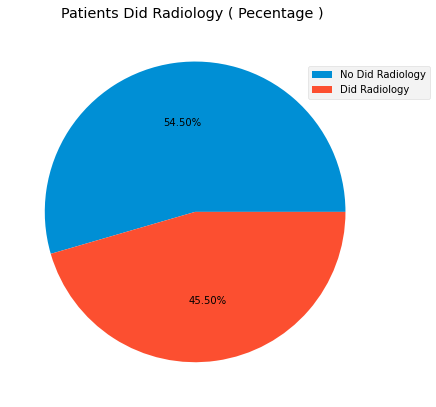

In [77]:
plt.figure(figsize=(6,8))
x = [
df[df['RADIOLOGY'].isna()].shape[0]/df.shape[0] * 100 ,
df[~df['RADIOLOGY'].isna()].shape[0] / df.shape[0] * 100
]

plt.pie(
    x = x,
    autopct='%1.2f%%')
plt.title('Patients Did Radiology ( Pecentage ) ')
plt.legend(['No Did Radiology', 'Did Radiology'], loc=(0.8,0.8));

In [78]:
mask = df['RADIOLOGY'].isna()
radiology_lst = df[~mask]['RADIOLOGY'].apply(lambda x: x.split(';'))

In [79]:
lst1 = radiology_lst.apply(lambda x: ' '.join(x).split('START: ,')[1:])

In [80]:
lst2 = lst1.apply(lambda x: [pd.to_datetime(x[i][24:40], dayfirst=True) - pd.to_datetime(x[i][:16], dayfirst=True) for i in range(len(x))])

In [81]:
lst3 = lst2.apply(lambda x: pd.to_timedelta(x))

In [82]:
lst3.apply(lambda x: x.max())[ lst3.apply(lambda x: x.max()) == lst3.apply(lambda x: x.max()).max() ]

460   88 days 11:25:00
Name: RADIOLOGY, dtype: timedelta64[ns]

In [83]:
radiology_dist = pd.DataFrame(lst3.apply(lambda x: len(x)).value_counts())
radiology_dist
radiology_dist.rename(columns={'RADIOLOGY':'Frequent'})
radiology_dist.index.name = 'No of Radiology'
radiology_dist

,RADIOLOGY
No of Radiology,
1,7935
2,3644
3,1200
4,415
5,206
6,95
7,52
8,23
10,19


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-84-c79b0074c6b2>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)


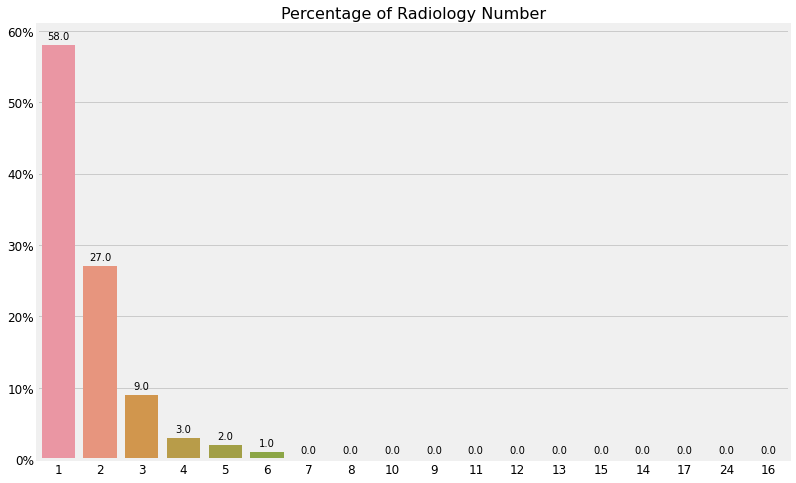

In [84]:
plt.figure(figsize=(12,8))

x = [str(n) for n in lst3.apply(lambda x: len(x)).value_counts().keys() ]
y = lst3.apply(lambda x: len(x)).value_counts(normalize=True).values.round(2)
y = [round(n * 100, 3) for n in y]
splot = sns.barplot(x,y)

for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)
plt.title('Percentage of Radiology Number', fontsize=16);

In [85]:
k = df[~df['RADIOLOGY'].isna()]['RADIOLOGY'].apply(lambda x: x.count('START:')).value_counts().keys()
v = df[~df['RADIOLOGY'].isna()]['RADIOLOGY'].apply(lambda x: x.count('START:')).value_counts().values
sum(k*v)

23293

In [86]:
k = lst3.apply(lambda x: len(x)).value_counts().keys()
v = lst3.apply(lambda x: len(x)).value_counts().values
sum(k*v)

23293

In [87]:
df['RADIOLOGY_DURATION'] = None

In [88]:
for i in lst3.index:
    df['RADIOLOGY_DURATION'][i] = lst3[i]

<ipython-input-88-2754aa6daace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RADIOLOGY_DURATION'][i] = lst3[i]


In [89]:
total_radilogy_lst = [item for lst in lst3 for item in lst]

In [90]:
print(f'Total Number of Radiology: {len(total_radilogy_lst)}')

Total Number of Radiology: 23293


In [91]:
pd.DataFrame(pd.Series(total_radilogy_lst).describe(), columns=['All Radiolgy'])

,All Radiolgy
count,23293
mean,0 days 04:22:59.296784441
std,1 days 07:08:22.670811450
min,0 days 00:01:00
25%,0 days 00:26:00
50%,0 days 00:51:00
75%,0 days 01:43:00
max,88 days 11:25:00


In [92]:
lab_test_without_end = []
lab_test_with_end = []
lab_test_without_end_ind = []
lab_test_with_end_ind = []

for i in radiology_lst.index:
    if len(radiology_lst[i])>1:
        for n in radiology_lst[i]:
            if len(n) <=50:
                lab_test_without_end.append(i)
                lab_test_without_end_ind.append(i)
            else:
                lab_test_with_end.append(i)
                lab_test_with_end_ind.append(i)
    else:
        if len(n) <=50:
            lab_test_without_end.append(i)
            lab_test_without_end_ind.append(i)
        else:
            lab_test_with_end.append(i)
            lab_test_with_end_ind.append(i)

In [93]:
len(lab_test_with_end)

23293

In [94]:
len(lab_test_without_end)

0

In [95]:
length_n = []
for i in radiology_lst.index:
    if len(radiology_lst[i]) > 1:
        for n in radiology_lst[i]:
            length_n.append(len(n))
    else:
        length_n.append(len(n))

In [96]:
pd.Series(length_n).describe()

count    23293.0
mean        57.0
std          0.0
min         57.0
25%         57.0
50%         57.0
75%         57.0
max         57.0
dtype: float64

# Analyzing PHARMASY Feature

In [97]:
df['PHARMECY'].isna().sum()

16449

In [98]:
df[~df['PHARMECY'].isna()]['PHARMECY'].shape[0]

13507

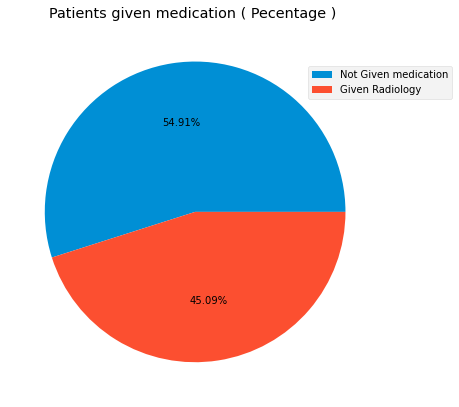

In [99]:
plt.figure(figsize=(6,8))
x = [
df[df['PHARMECY'].isna()].shape[0]/df.shape[0] * 100 ,
df[~df['PHARMECY'].isna()].shape[0] / df.shape[0] * 100
]

plt.pie(
    x = x,
    autopct='%1.2f%%')
plt.title('Patients given medication ( Pecentage ) ')
plt.legend(['Not Given medication', 'Given Radiology'], loc=(0.8,0.8));

In [100]:
df['PHARMECY'][1]

'3945770 START: ,02-01-2021 00:36, END: ,02-01-2021 00:43,;3945770 START: ,02-01-2021 00:36, END: ,02-01-2021 00:43,'

In [101]:
mask = df['PHARMECY'].isna()
pharmecy_lst = df[~mask]['PHARMECY'].apply(lambda x: x.split(';'))

In [102]:
lst1 = pharmecy_lst.apply(lambda x: ' '.join(x).split('START: ,')[1:])

In [103]:
lst2 = lst1.apply(lambda x: [pd.to_datetime(x[i][24:40], dayfirst=True) - pd.to_datetime(x[i][:16], dayfirst=True) for i in range(len(x))])

In [104]:
lst3 = lst2.apply(lambda x: pd.to_timedelta(x))

In [105]:
lst3.apply(lambda x: x.max())[ lst3.apply(lambda x: x.max()) == lst3.apply(lambda x: x.max()).max() ]

8724   63 days 10:35:00
Name: PHARMECY, dtype: timedelta64[ns]

In [106]:
df['PHARMECY'][8724]

'3971810 START: ,26-01-2021 13:42, END: ,31-03-2021 00:17,'

In [107]:
k = df[~df['PHARMECY'].isna()]['PHARMECY'].apply(lambda x: x.count('START:')).value_counts().keys()
v = df[~df['PHARMECY'].isna()]['PHARMECY'].apply(lambda x: x.count('START:')).value_counts().values
sum(k*v)

30450

In [108]:
k = lst3.apply(lambda x: len(x)).value_counts().keys()
v = lst3.apply(lambda x: len(x)).value_counts().values
sum(k*v)

30450

In [109]:
pharmasy_dist = pd.DataFrame(lst3.apply(lambda x: len(x)).value_counts())
pharmasy_dist.rename(columns={'PHARAMSY': 'Frequent'})
pharmasy_dist.index.name = 'No of Pharmasy'
pharmasy_dist

,PHARMECY
No of Pharmasy,
2,5940
1,3246
3,2838
4,980
5,301
6,117
7,38
8,25
9,9


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-110-afbbd4ca2b99>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)


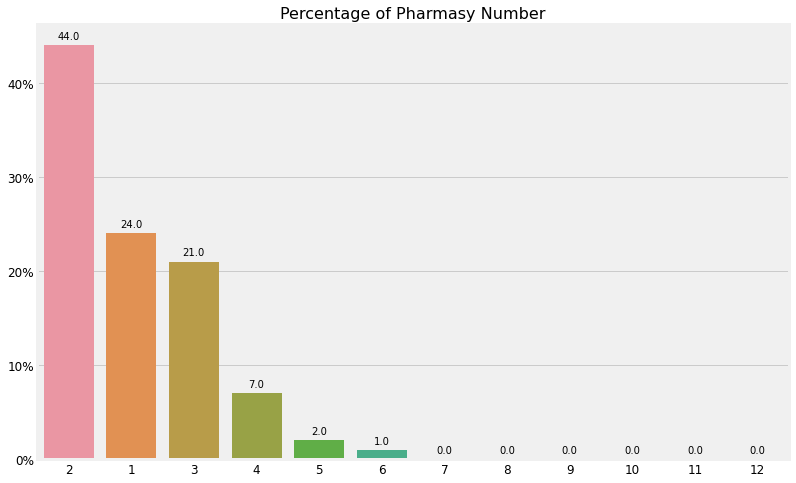

In [110]:
plt.figure(figsize=(12,8))

x = [str(n) for n in lst3.apply(lambda x: len(x)).value_counts().keys() ]
y = lst3.apply(lambda x: len(x)).value_counts(normalize=True).values.round(2)
y = [round(n * 100, 3) for n in y]
splot = sns.barplot(x,y)

for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
splot.set_yticklabels([str(round(s))+'%' for s in splot.get_yticks() ], fontsize = 12)
plt.title('Percentage of Pharmasy Number', fontsize=16);

In [111]:
df['PHARMECY_DURATION'] = None

In [112]:
for i in lst3.index:
    df['PHARMECY_DURATION'][i] = lst3[i]

<ipython-input-112-a32bb97695d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PHARMECY_DURATION'][i] = lst3[i]


In [113]:
total_pharmecy_lst = [item for lst in lst3 for item in lst]

In [114]:
print(f'Total Pharmacy Number: {len(total_pharmecy_lst)}')

Total Pharmacy Number: 30450


In [115]:
pd.DataFrame(pd.Series(total_pharmecy_lst).describe(), columns=['Statistics'])

,Statistics
count,30450
mean,0 days 01:32:03.570443349
std,1 days 01:01:41.266690727
min,0 days 00:00:00
25%,0 days 00:06:00
50%,0 days 00:13:00
75%,0 days 00:31:00
max,63 days 10:35:00


In [116]:
pd.Series(total_pharmecy_lst).isna().sum()

0

In [117]:
lab_test_without_end = []
lab_test_with_end = []
lab_test_without_end_ind = []
lab_test_with_end_ind = []

for i in pharmecy_lst.index:
    if len(pharmecy_lst[i])>1:
        for n in pharmecy_lst[i]:
            if len(n) <=50:
                lab_test_without_end.append(i)
                lab_test_without_end_ind.append(i)
            else:
                lab_test_with_end.append(i)
                lab_test_with_end_ind.append(i)
    else:
        if len(n) <=50:
            lab_test_without_end.append(i)
            lab_test_without_end_ind.append(i)
        else:
            lab_test_with_end.append(i)
            lab_test_with_end_ind.append(i)

In [118]:
len(lab_test_with_end)

30450

In [119]:
len(lab_test_without_end)

0

In [120]:
length_n = []
for i in pharmecy_lst.index:
    if len(pharmecy_lst[i]) >1:
        for n in pharmecy_lst[i]:
            length_n.append(len(n))
    else:
        length_n.append(len(n))

In [121]:
pd.Series(length_n).describe()

count    30450.0
mean        57.0
std          0.0
min         57.0
25%         57.0
50%         57.0
75%         57.0
max         57.0
dtype: float64